In [1]:
from pyspark.sql import SparkSession
sp = SparkSession.builder.appName('liver').getOrCreate()

23/06/02 22:15:20 WARN Utils: Your hostname, helium-HP resolves to a loopback address: 127.0.1.1; using 192.168.27.23 instead (on interface wlo1)
23/06/02 22:15:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/02 22:15:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import isnull, isnan, count, col, when , count_distinct, collect_list, mean
df = sp.read.csv('/home/helium/Desktop/DS/data_science/ineuron_assignments/interview_based_assessment/assignment/ML/chemical_flask/indian_liver_patient.csv', inferSchema=True, header=True)

In [3]:
df.show()

+---+------+---------------+----------------+--------------------+------------------------+--------------------------+--------------+-------+--------------------------+-------+
|Age|Gender|Total_Bilirubin|Direct_Bilirubin|Alkaline_Phosphotase|Alamine_Aminotransferase|Aspartate_Aminotransferase|Total_Protiens|Albumin|Albumin_and_Globulin_Ratio|Dataset|
+---+------+---------------+----------------+--------------------+------------------------+--------------------------+--------------+-------+--------------------------+-------+
| 65|Female|            0.7|             0.1|                 187|                      16|                        18|           6.8|    3.3|                       0.9|      1|
| 62|  Male|           10.9|             5.5|                 699|                      64|                       100|           7.5|    3.2|                      0.74|      1|
| 62|  Male|            7.3|             4.1|                 490|                      60|                        

In [4]:
#dataset shape
print(f'({df.count()},{len(df.columns)})')

(583,11)


In [5]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Total_Bilirubin: double (nullable = true)
 |-- Direct_Bilirubin: double (nullable = true)
 |-- Alkaline_Phosphotase: integer (nullable = true)
 |-- Alamine_Aminotransferase: integer (nullable = true)
 |-- Aspartate_Aminotransferase: integer (nullable = true)
 |-- Total_Protiens: double (nullable = true)
 |-- Albumin: double (nullable = true)
 |-- Albumin_and_Globulin_Ratio: double (nullable = true)
 |-- Dataset: integer (nullable = true)



In [6]:
df.describe().show()

23/06/02 22:15:38 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------+-----------------+------------------+--------------------+------------------------+--------------------------+------------------+-----------------+--------------------------+------------------+
|summary|               Age|Gender|  Total_Bilirubin|  Direct_Bilirubin|Alkaline_Phosphotase|Alamine_Aminotransferase|Aspartate_Aminotransferase|    Total_Protiens|          Albumin|Albumin_and_Globulin_Ratio|           Dataset|
+-------+------------------+------+-----------------+------------------+--------------------+------------------------+--------------------------+------------------+-----------------+--------------------------+------------------+
|  count|               583|   583|              583|               583|                 583|                     583|                       583|               583|              583|                       579|               583|
|   mean| 44.74614065180103|  null|3.298799313893652|1.4861063464837074|  290.576329

In [7]:
df.select([count(when(isnan(i)| col(i).isNull(),i)).alias(i) for i in df.columns]).show()


+---+------+---------------+----------------+--------------------+------------------------+--------------------------+--------------+-------+--------------------------+-------+
|Age|Gender|Total_Bilirubin|Direct_Bilirubin|Alkaline_Phosphotase|Alamine_Aminotransferase|Aspartate_Aminotransferase|Total_Protiens|Albumin|Albumin_and_Globulin_Ratio|Dataset|
+---+------+---------------+----------------+--------------------+------------------------+--------------------------+--------------+-------+--------------------------+-------+
|  0|     0|              0|               0|                   0|                       0|                         0|             0|      0|                         4|      0|
+---+------+---------------+----------------+--------------------+------------------------+--------------------------+--------------+-------+--------------------------+-------+



In [8]:
[(df.select(count_distinct(i)).show()) for i in df.columns]

+-------------------+
|count(DISTINCT Age)|
+-------------------+
|                 72|
+-------------------+

+----------------------+
|count(DISTINCT Gender)|
+----------------------+
|                     2|
+----------------------+

+-------------------------------+
|count(DISTINCT Total_Bilirubin)|
+-------------------------------+
|                            113|
+-------------------------------+

+--------------------------------+
|count(DISTINCT Direct_Bilirubin)|
+--------------------------------+
|                              80|
+--------------------------------+

+------------------------------------+
|count(DISTINCT Alkaline_Phosphotase)|
+------------------------------------+
|                                 263|
+------------------------------------+

+----------------------------------------+
|count(DISTINCT Alamine_Aminotransferase)|
+----------------------------------------+
|                                     152|
+----------------------------------------+

+---

[None, None, None, None, None, None, None, None, None, None, None]

In [9]:
[(df.select(i).distinct().show()) for i in df.columns]

+---+
|Age|
+---+
| 31|
| 85|
| 65|
| 53|
| 78|
| 34|
| 28|
| 26|
| 27|
| 44|
| 12|
| 22|
| 47|
| 52|
| 13|
|  6|
| 16|
| 40|
| 20|
| 57|
+---+
only showing top 20 rows

+------+
|Gender|
+------+
|Female|
|  Male|
+------+

+---------------+
|Total_Bilirubin|
+---------------+
|            2.4|
|            8.0|
|           10.2|
|           16.6|
|           15.9|
|           11.5|
|            3.5|
|            7.7|
|           17.3|
|            6.6|
|            8.7|
|            2.9|
|            3.7|
|            4.5|
|            5.7|
|            1.4|
|            1.7|
|            6.7|
|           20.2|
|           75.0|
+---------------+
only showing top 20 rows

+----------------+
|Direct_Bilirubin|
+----------------+
|             2.4|
|            10.2|
|            18.3|
|            11.4|
|             7.0|
|             9.5|
|             6.1|
|             7.7|
|             0.2|
|             2.9|
|             3.7|
|            19.7|
|             4.5|
|            

[None, None, None, None, None, None, None, None, None, None, None]

In [10]:
#fille null values of second last column

mean_value = df.agg(mean('Albumin_and_Globulin_Ratio')).collect()[0][0]
print(mean_value)

df_filled = df.fillna(mean_value, subset=['Albumin_and_Globulin_Ratio'])
df_filled.show()

df.select([count(when(isnan(i)| col(i).isNull(),i)).alias(i) for i in df.columns]).show()

0.9470639032815201
+---+------+---------------+----------------+--------------------+------------------------+--------------------------+--------------+-------+--------------------------+-------+
|Age|Gender|Total_Bilirubin|Direct_Bilirubin|Alkaline_Phosphotase|Alamine_Aminotransferase|Aspartate_Aminotransferase|Total_Protiens|Albumin|Albumin_and_Globulin_Ratio|Dataset|
+---+------+---------------+----------------+--------------------+------------------------+--------------------------+--------------+-------+--------------------------+-------+
| 65|Female|            0.7|             0.1|                 187|                      16|                        18|           6.8|    3.3|                       0.9|      1|
| 62|  Male|           10.9|             5.5|                 699|                      64|                       100|           7.5|    3.2|                      0.74|      1|
| 62|  Male|            7.3|             4.1|                 490|                      60|     

In [11]:
df = df.toPandas()

In [12]:
(sns.histplot(df[i], kde=True) for i in df.columns)

<generator object <genexpr> at 0x7f9923198970>

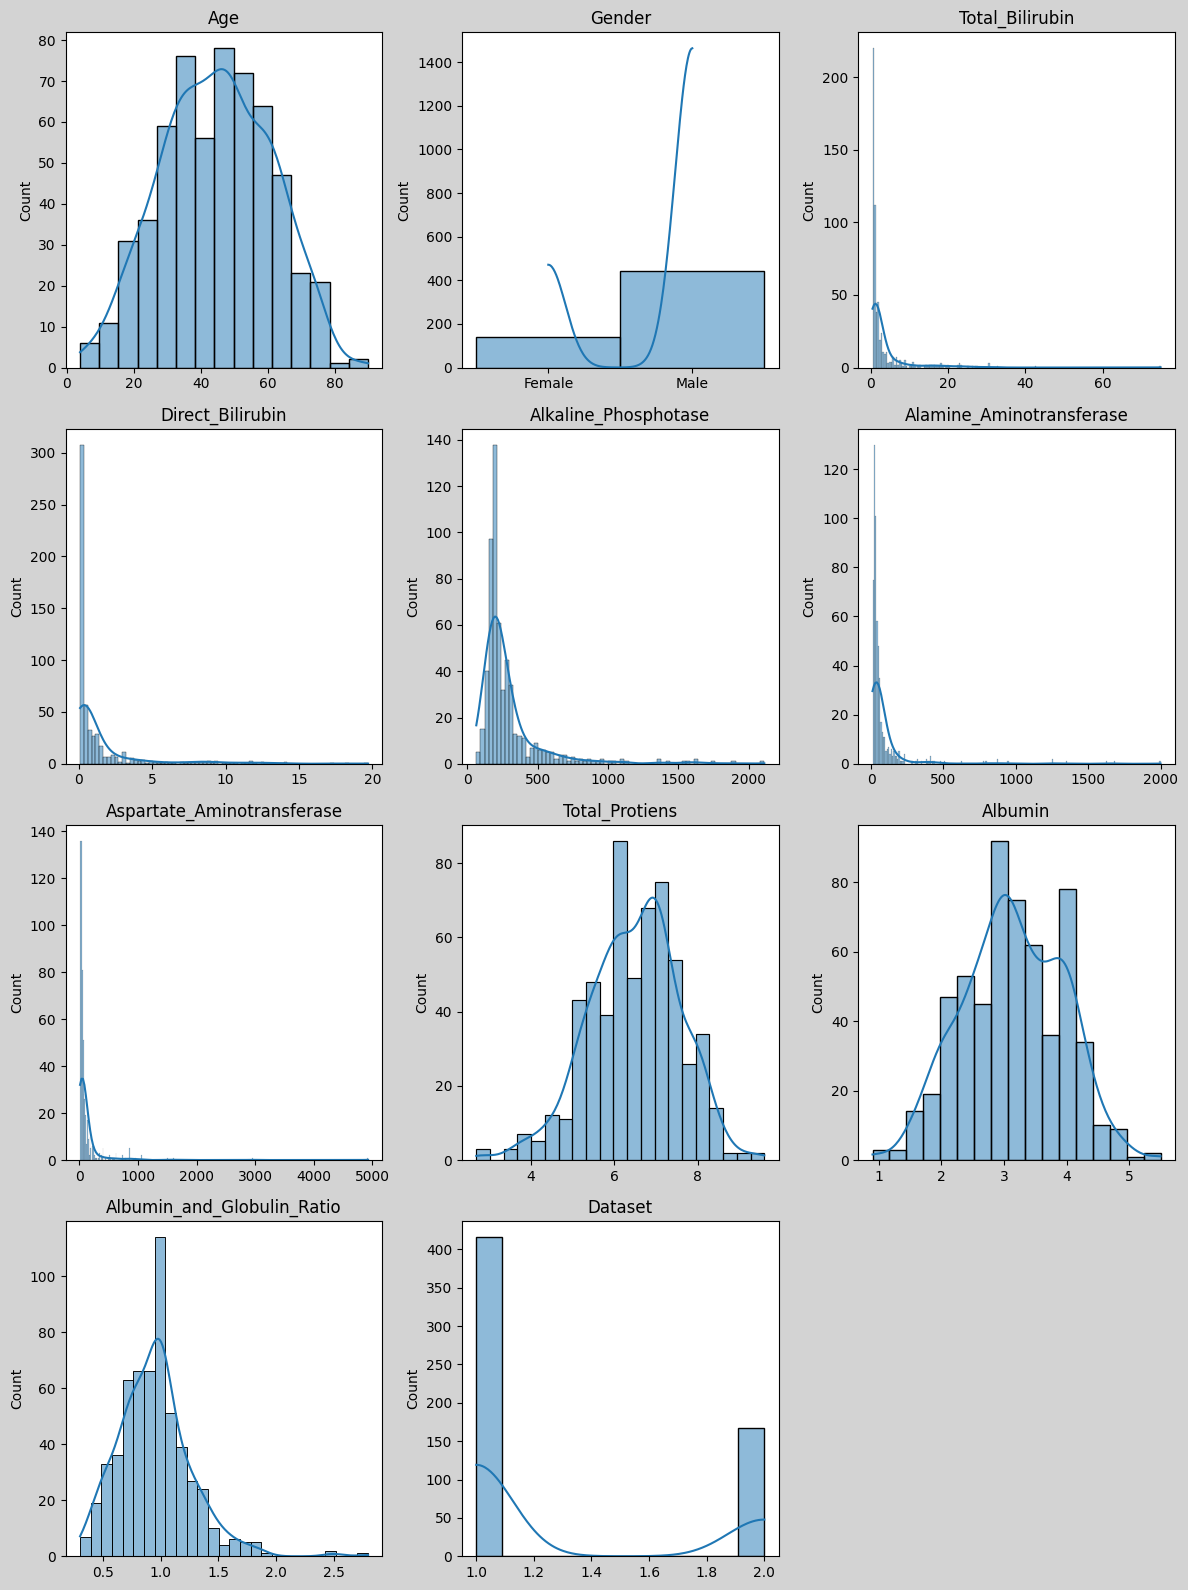

In [13]:
# Calculate the number of rows and columns needed for subplots
n_rows = (df.shape[1] - 1) // 3 + 1  # Assuming you want 3 subplots per row

# Create a figure and subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(12, n_rows*4))

# Set the background color of the figure to gray
fig.patch.set_facecolor('lightgray')

# Flatten the axes array if there's only one row
if n_rows == 1:
    axes = [axes]

# Iterate over each column in the dataframe
for i, col in enumerate(df.columns):
    # Calculate the subplot coordinates
    row_idx = i // 3
    col_idx = i % 3
    
    # Select the current subplot
    ax = axes[row_idx][col_idx]
    
    # Plot a histogram using seaborn for the current column
    sns.histplot(data=df, kde=True, x=col, ax=ax)
    
    # Set subplot title
    ax.set_title(col)
    
    # Remove xlabel to avoid overlap
    ax.set_xlabel("")
    
# Remove any empty subplots
if n_rows * 3 > df.shape[1]:
    for j in range(df.shape[1] % 3, 3):
        axes[n_rows - 1][j].remove()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

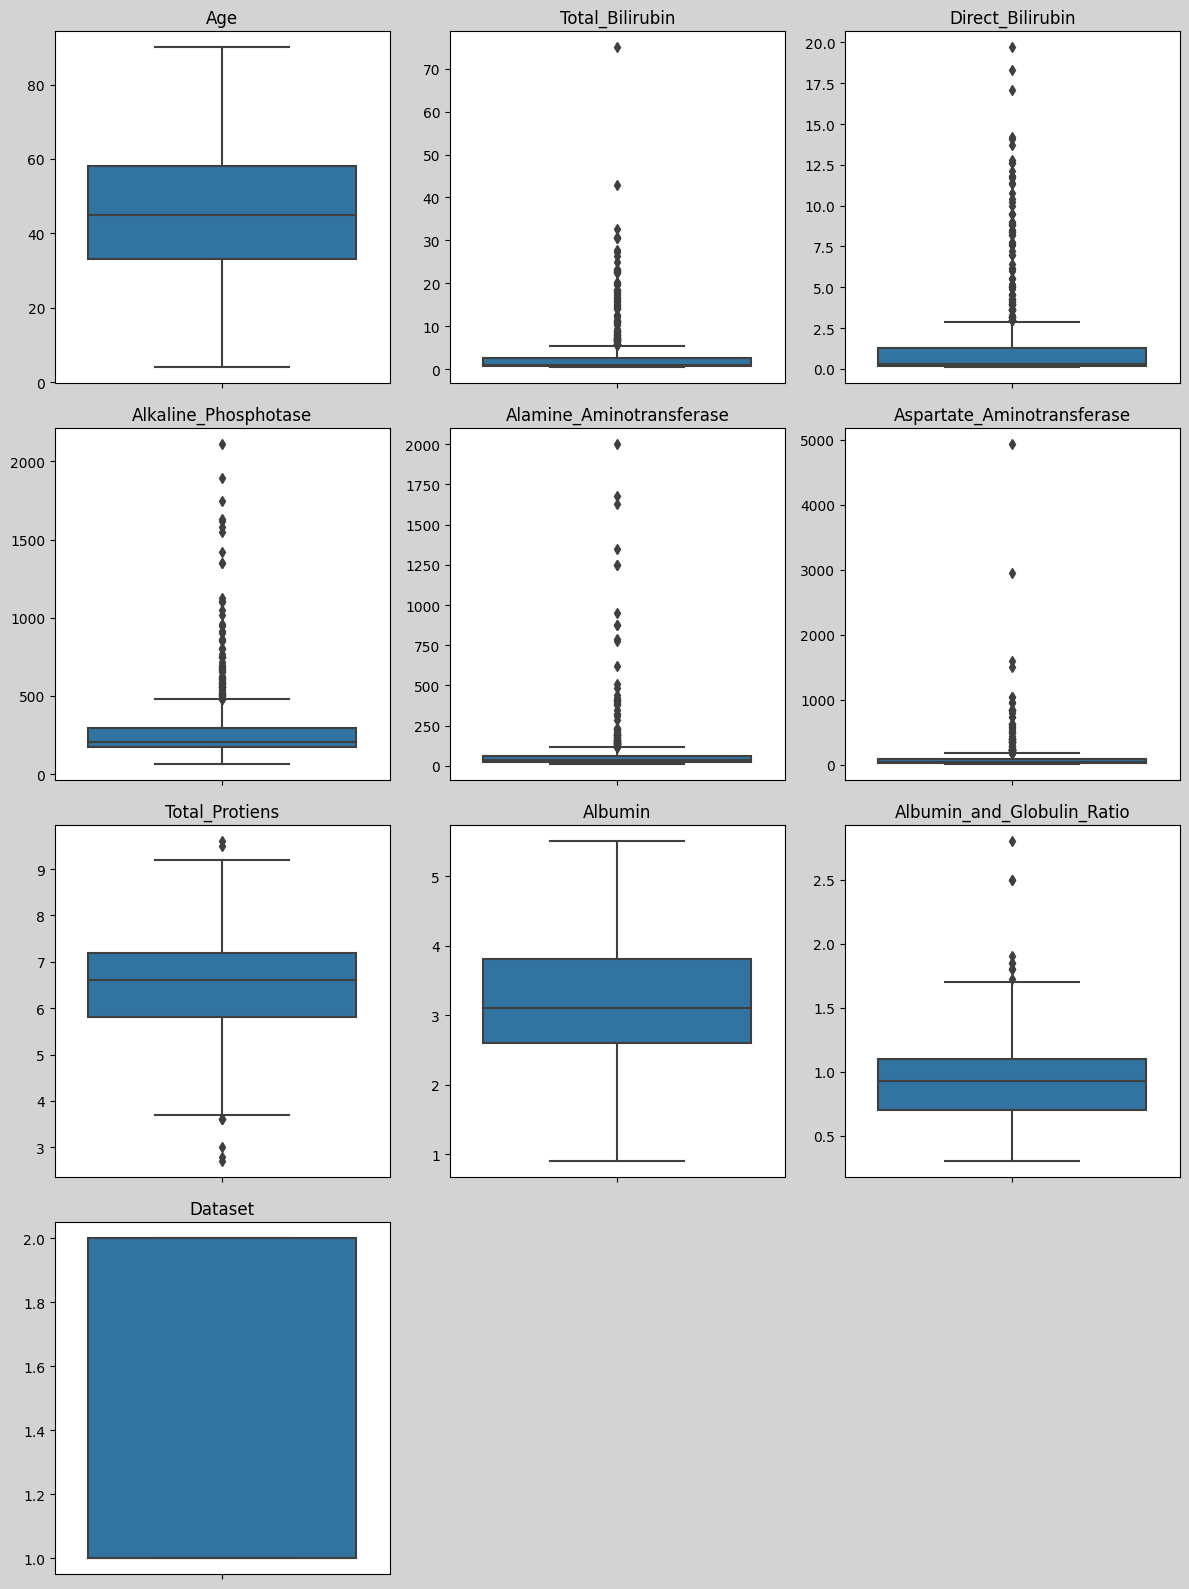

In [14]:

# Select numeric columns from the dataframe
numeric_columns = df.select_dtypes(include='number').columns

# Calculate the number of rows and columns needed for subplots
n_rows = (len(numeric_columns) - 1) // 3 + 1  # Assuming you want 3 subplots per row

# Create a figure and subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(12, n_rows*4))

fig.patch.set_facecolor('lightgray')

# Flatten the axes array if there's only one row
if n_rows == 1:
    axes = [axes]

# Iterate over each numeric column
for i, col in enumerate(numeric_columns):
    # Calculate the subplot coordinates
    row_idx = i // 3
    col_idx = i % 3
    
    # Select the current subplot
    ax = axes[row_idx][col_idx]
    
    # Plot a box plot using seaborn for the current column
    sns.boxplot(data=df, y=col, ax=ax)
    
    # Set subplot title
    ax.set_title(col)
    
    # Remove ylabel to avoid overlap
    ax.set_ylabel("")
    
# Remove any empty subplots
if n_rows * 3 > len(numeric_columns):
    for j in range(len(numeric_columns) % 3, 3):
        axes[n_rows - 1][j].remove()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


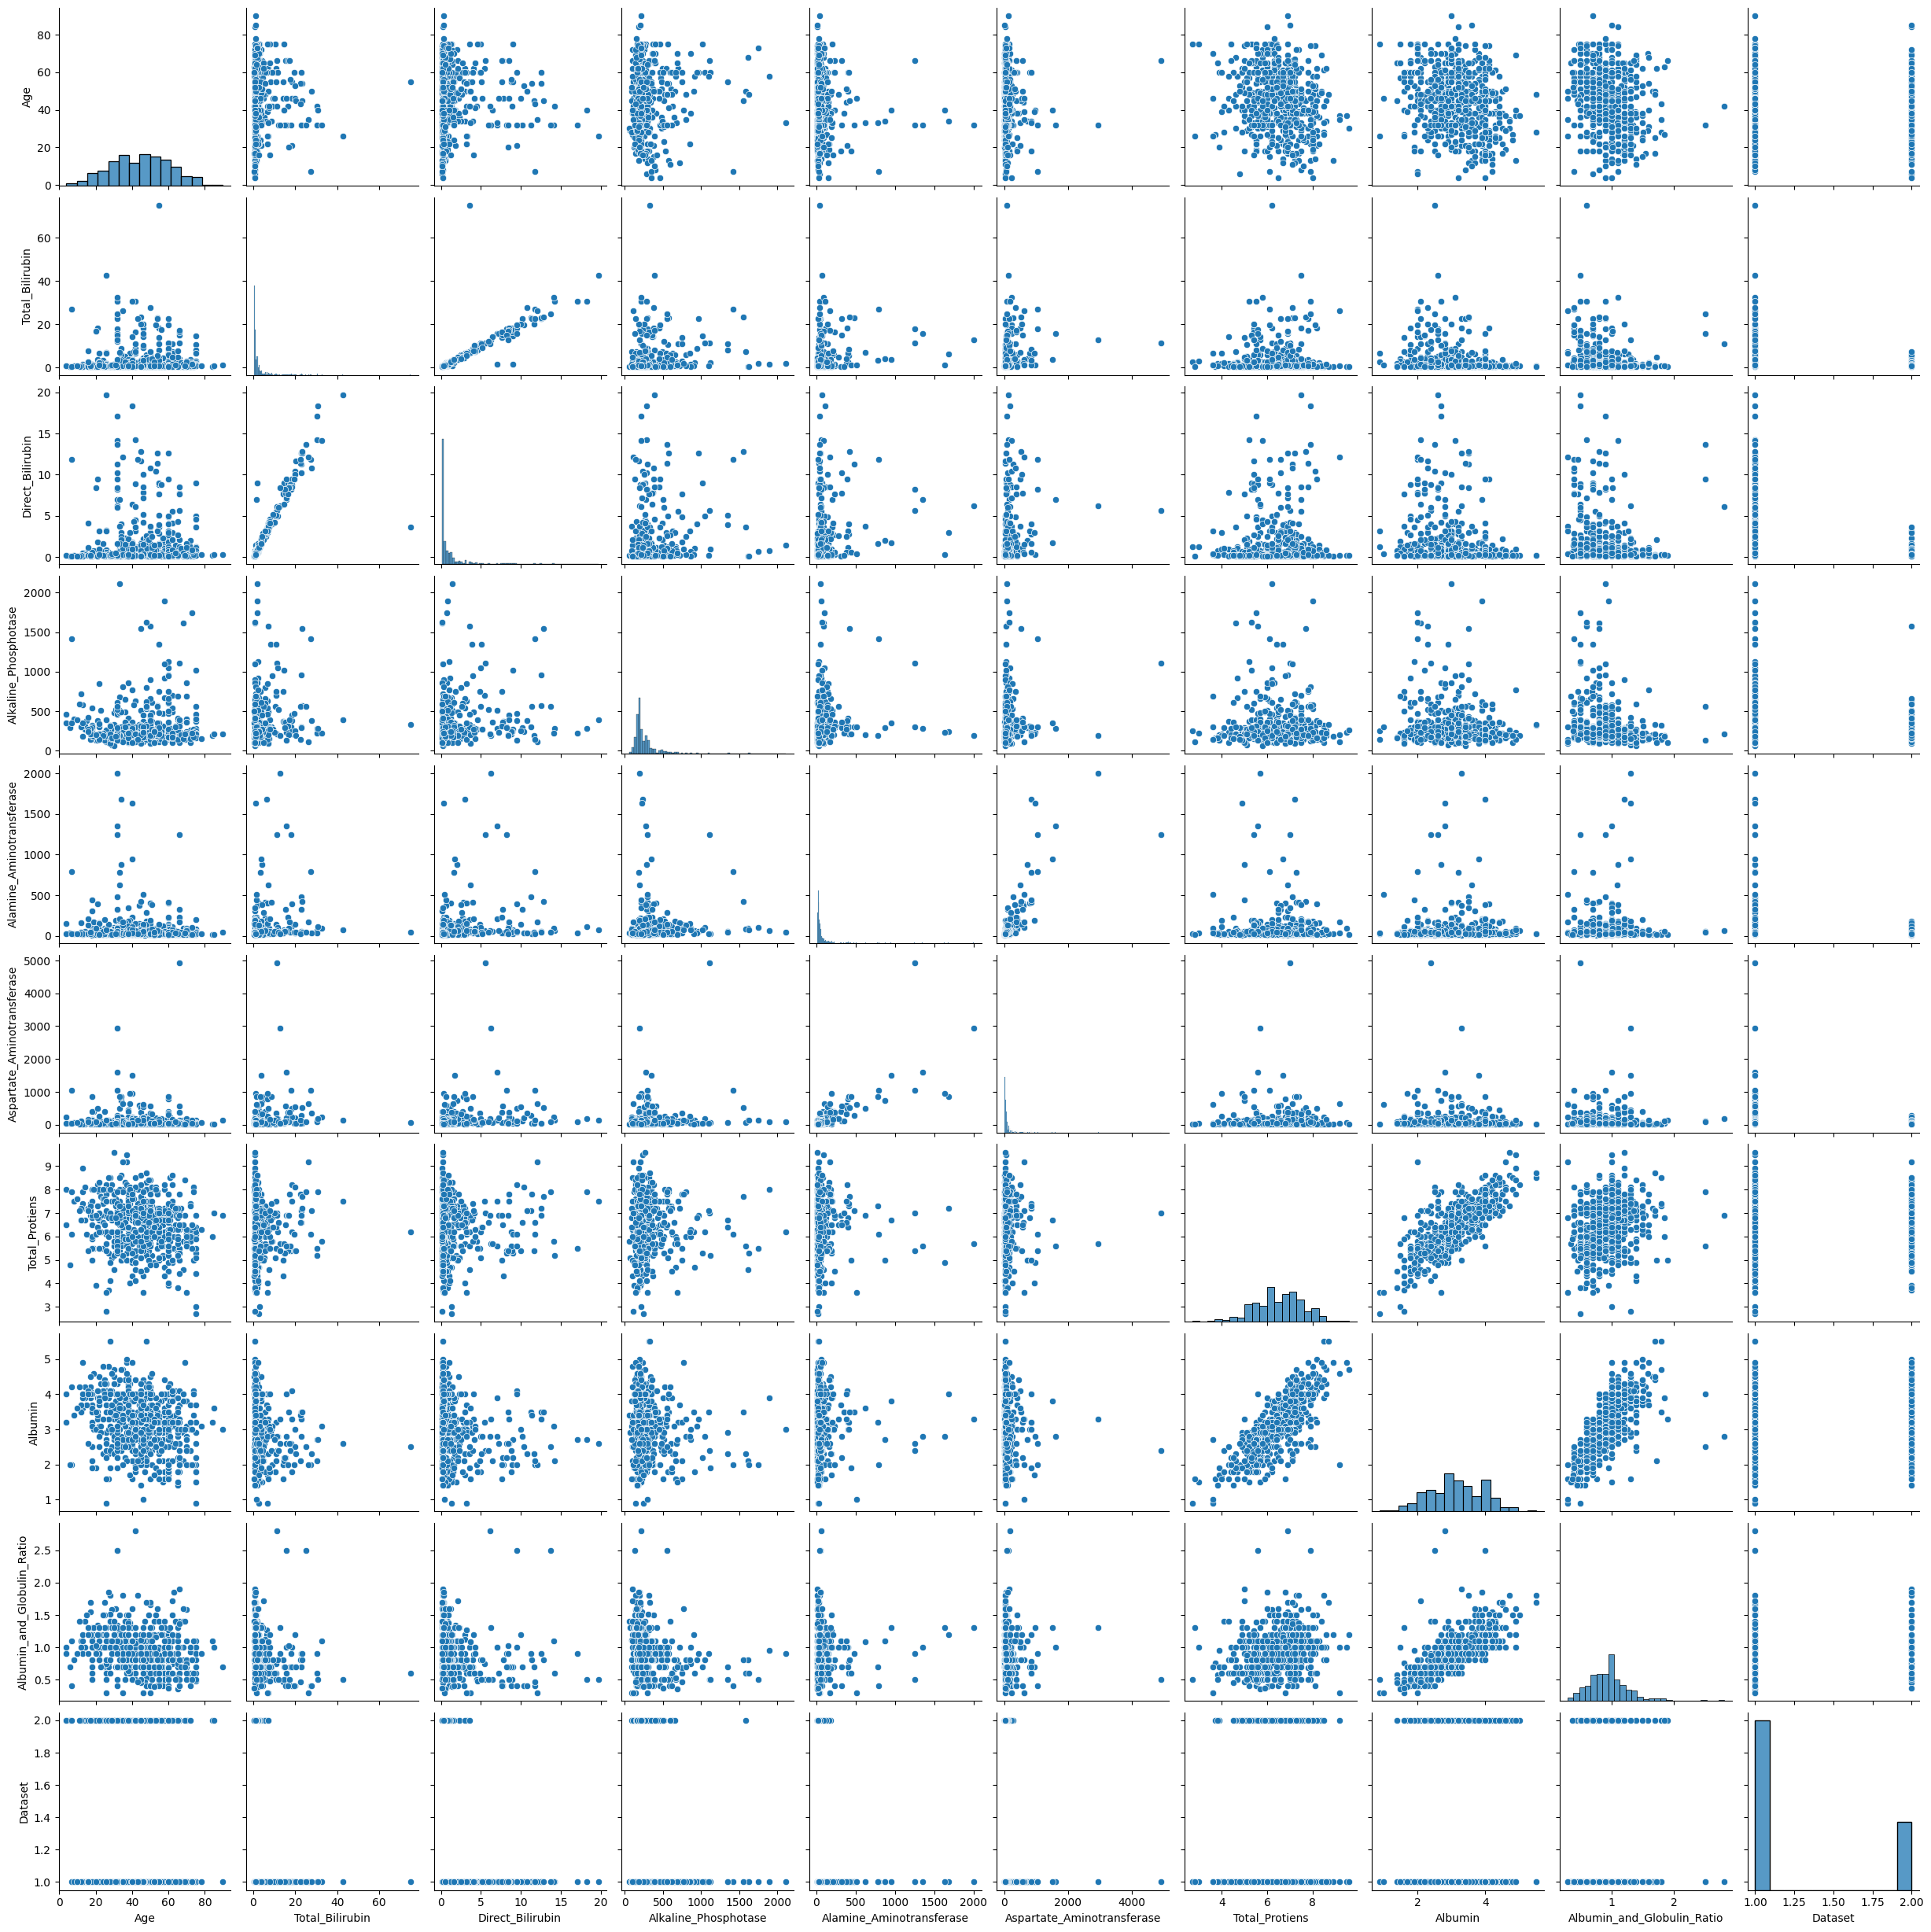

In [15]:
import seaborn as sns

# Assuming you have imported the necessary libraries and have the dataframe 'df' ready

# Create a pair plot of the dataframe
sns.pairplot(df)

# Show the plot
plt.show()

In [16]:
#doing feature selection
#for feature selection we have to apply some tests on columns
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [17]:
import pandas as pd

# Perform one-hot encoding using pandas get_dummies
encoded_df = pd.get_dummies(df['Gender'])

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Display the encoded DataFrame
print(df_encoded)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [18]:
df_encoded = df_encoded.drop('Gender', axis=1)

In [19]:
#fill missing values
df_encoded.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
Female                        0
Male                          0
dtype: int64

In [20]:
ratio_mean = round(df['Albumin_and_Globulin_Ratio'].mean(),2)
ratio_mean

0.95

In [21]:
df_encoded = df_encoded.fillna(ratio_mean)

In [22]:
df_encoded.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
Female                        0
Male                          0
dtype: int64

In [23]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df_encoded)

VarianceThreshold(threshold=0)

In [24]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [25]:
df_encoded.columns[var_thres.get_support()]

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Female', 'Male'],
      dtype='object')

In [26]:
constant_columns = [column for column in df_encoded.columns
                    if column not in df_encoded.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [27]:
#there is no column which has 0 variance so we will look for other method called correlation matrix
df_encoded.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Female,Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216109,-0.137351,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206184,-0.220208,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200030,-0.246046,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233989,-0.184866,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002395,-0.163416,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233916,0.035008,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686360,0.161388,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216109,-0.206184,-0.200030,-0.233989,-0.002395,-0.070040,0.233916,0.686360,1.000000,0.162349,0.003442,-0.003442
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162349,1.000000,0.082416,-0.082416


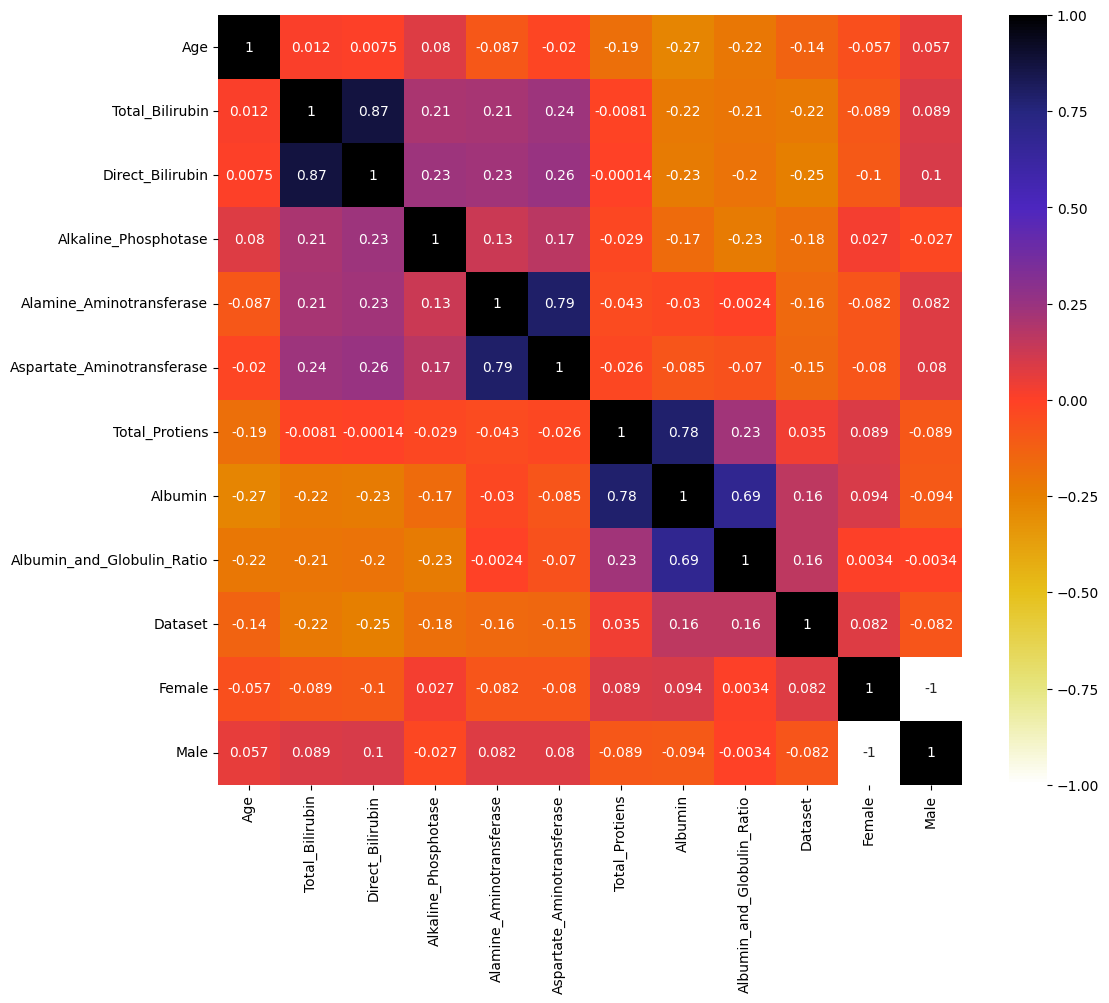

In [28]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
#these columns are the feature which are correlated to each other and we willl use only one of them for ML model, to avoid multicolinearity
corr_features = correlation(df_encoded, 0.75)
len(set(corr_features))
corr_features

{'Albumin', 'Aspartate_Aminotransferase', 'Direct_Bilirubin', 'Male'}

In [31]:
df_drop_4 = df_encoded.drop(corr_features,axis=1)

In [32]:
df_drop_4

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio,Dataset,Female
0,65,0.7,187,16,6.8,0.90,1,1
1,62,10.9,699,64,7.5,0.74,1,0
2,62,7.3,490,60,7.0,0.89,1,0
3,58,1.0,182,14,6.8,1.00,1,0
4,72,3.9,195,27,7.3,0.40,1,0
...,...,...,...,...,...,...,...,...
578,60,0.5,500,20,5.9,0.37,2,0
579,40,0.6,98,35,6.0,1.10,1,0
580,52,0.8,245,48,6.4,1.00,1,0
581,31,1.3,184,29,6.8,1.00,1,0


In [33]:
df_train = df_encoded.drop('Dataset',axis=1)
df_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Female,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,0,1


In [34]:
#check for chi square test to select features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,
                                              df['Dataset'],test_size=0.3,random_state=100)

In [35]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [36]:
f_p_values

(array([5.94711751e+01, 2.09160274e+02, 1.31256791e+02, 3.22108566e+03,
        3.11269662e+03, 5.63112837e+03, 1.88387604e-02, 2.09787355e+00,
        1.88371996e+00, 3.34950790e+00, 1.04470182e+00]),
 array([1.24098569e-14, 2.09445921e-47, 2.17561021e-30, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.90829741e-01, 1.47504155e-01,
        1.69911952e-01, 6.72251075e-02, 3.06730469e-01]))

In [37]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

Age                           1.240986e-14
Total_Bilirubin               2.094459e-47
Direct_Bilirubin              2.175610e-30
Alkaline_Phosphotase          0.000000e+00
Alamine_Aminotransferase      0.000000e+00
Aspartate_Aminotransferase    0.000000e+00
Total_Protiens                8.908297e-01
Albumin                       1.475042e-01
Albumin_and_Globulin_Ratio    1.699120e-01
Female                        6.722511e-02
Male                          3.067305e-01
dtype: float64

In [38]:
#most important features in decending orders - 
p_values.sort_index(ascending=False)

Total_Protiens                8.908297e-01
Total_Bilirubin               2.094459e-47
Male                          3.067305e-01
Female                        6.722511e-02
Direct_Bilirubin              2.175610e-30
Aspartate_Aminotransferase    0.000000e+00
Alkaline_Phosphotase          0.000000e+00
Albumin_and_Globulin_Ratio    1.699120e-01
Albumin                       1.475042e-01
Alamine_Aminotransferase      0.000000e+00
Age                           1.240986e-14
dtype: float64

In [39]:
#now we will use 3rd method (INFORMATION GAIN) to find out most important features for ML model
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.08313221, 0.0846292 , 0.05656743, 0.03811426, 0.07719258,
       0.04402821, 0.        , 0.        , 0.04649675, 0.        ,
       0.        ])

In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Total_Bilirubin               0.084629
Age                           0.083132
Alamine_Aminotransferase      0.077193
Direct_Bilirubin              0.056567
Albumin_and_Globulin_Ratio    0.046497
Aspartate_Aminotransferase    0.044028
Alkaline_Phosphotase          0.038114
Total_Protiens                0.000000
Albumin                       0.000000
Female                        0.000000
Male                          0.000000
dtype: float64

<Axes: >

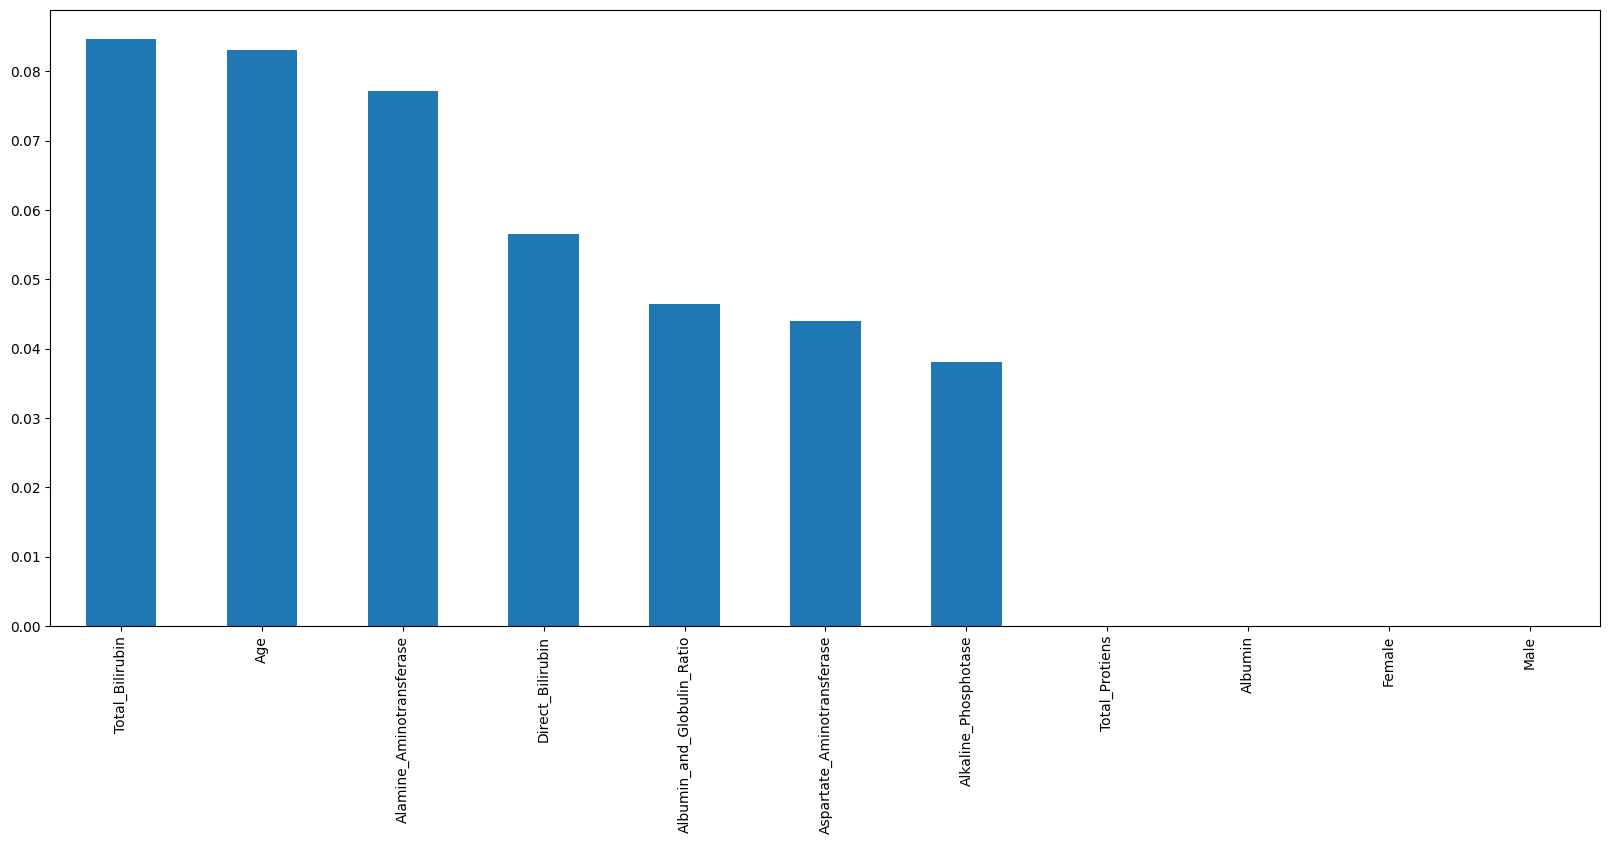

In [41]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [42]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 8 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=8)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Albumin_and_Globulin_Ratio', 'Female'],
      dtype='object')

In [54]:
df_corr = df_encoded.drop(['Albumin','Aspartate_Aminotransferase','Direct_Bilirubin','Male'], axis = 1)

In [57]:
df_corr.to_csv('df_corr.csv')

In [52]:
#MAKE ML CLASSIFICATION MODEL USING PYSPARK- 
#we will create ML classification model , feature selected by correlation matrix
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
assembler_input = ['Age','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Total_Protiens','Albumin_and_Globulin_Ratio','Female']
vector_assembler = VectorAssembler(inputCols=assembler_input, outputCol='Dataset')
assembler_temp= vector_assembler.transform(df_encoded)
assembler_temp.show()

TypeError: Invalid param value given for param "outputCol". Could not convert <class 'pandas.core.series.Series'> to string type